Post-chapter 4 problems

Problem 9. Train a LinearSVC on a linearly seaparable dataset. Then train an SVC and a SGDClassifier on the same dataset. See if you can get them to produce roughly the same model. 

In [26]:
from matplotlib import pyplot as plt
import sklearn

In [22]:
from sklearn.datasets import load_iris
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier


iris = load_iris(as_frame=True)
X = iris.data[['petal length (cm)', 'petal width (cm)']].values
y = iris.target
filter_ = (y == 0) | (y == 1)
X = X[filter_]
y = y[filter_]
scaler = StandardScaler()
scaled_x = scaler.fit_transform(X)

svm_linear = LinearSVC(loss='hinge',C=1, random_state=42).fit(scaled_x, y)

svc_classf = SVC(kernel='linear',C=1, random_state=42).fit(scaled_x, y)

sgdc = SGDClassifier(loss='hinge',alpha=0.0007, random_state=42).fit(scaled_x, y)



/home/sgolubev/miniconda3/envs/handson/lib/python3.12/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


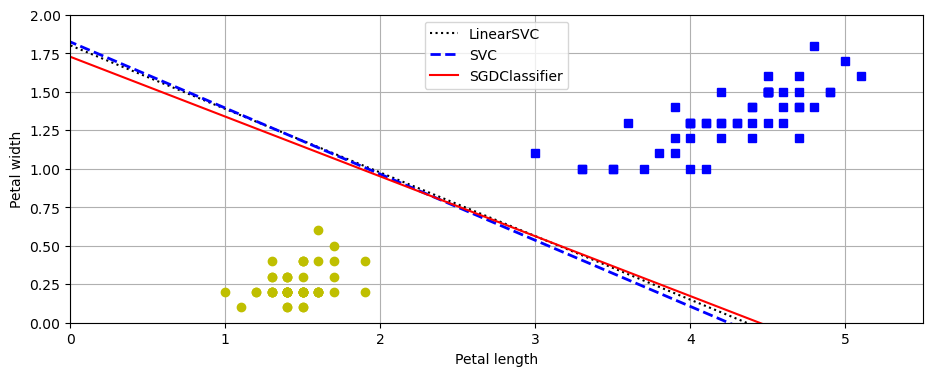

In [23]:

def compute_decision_boundary(model):
    w = -model.coef_[0, 0] / model.coef_[0, 1]
    b = -model.intercept_[0] / model.coef_[0, 1]
    return scaler.inverse_transform([[-10, -10 * w + b], [10, 10 * w + b]])

lin_line = compute_decision_boundary(svm_linear)
svc_line = compute_decision_boundary(svc_classf)
sgd_line = compute_decision_boundary(sgdc)

# Plot all three decision boundaries
plt.figure(figsize=(11, 4))
plt.plot(lin_line[:, 0], lin_line[:, 1], "k:", label="LinearSVC")
plt.plot(svc_line[:, 0], svc_line[:, 1], "b--", linewidth=2, label="SVC")
plt.plot(sgd_line[:, 0], sgd_line[:, 1], "r-", label="SGDClassifier")
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs") # label="Iris versicolor"
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo") # label="Iris setosa"
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.legend(loc="upper center")
plt.axis([0, 5.5, 0, 2])
plt.grid()

plt.show()

_Exercise: Train an SVM classifier on the Wine dataset, which you can load using `sklearn.datasets.load_wine()`. This dataset contains the chemical analysis of 178 wine samples produced by 3 different cultivators: the goal is to train a classification model capable of predicting the cultivator based on the wine's chemical analysis. Since SVM classifiers are binary classifiers, you will need to use one-versus-all to classify all 3 classes. What accuracy can you reach?_

In [45]:
wine = sklearn.datasets.load_wine(as_frame=True)
X = wine.data
y= wine.target
list(wine)

['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names']

In [41]:
wine.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [50]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42)


In [53]:
lin_clf = LinearSVC(C=1, dual=True, random_state=42, max_iter = 1000000).fit(X_train, y_train)

/home/sgolubev/miniconda3/envs/handson/lib/python3.12/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [56]:
# cross validation

from sklearn.model_selection import cross_val_score
print(cross_val_score(lin_clf, X_train, y_train).mean())

/home/sgolubev/miniconda3/envs/handson/lib/python3.12/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/sgolubev/miniconda3/envs/handson/lib/python3.12/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/sgolubev/miniconda3/envs/handson/lib/python3.12/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/sgolubev/miniconda3/envs/handson/lib/python3.12/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.90997150997151


/home/sgolubev/miniconda3/envs/handson/lib/python3.12/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Scale the features


In [57]:
lin_clf = make_pipeline(StandardScaler(), LinearSVC(C=1, dual=True, random_state=42))
lin_clf.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearsvc', LinearSVC(C=1, dual=True, random_state=42))])

In [58]:
from sklearn.model_selection import cross_val_score
print(cross_val_score(lin_clf, X_train, y_train).mean())

0.9774928774928775


Try kernelized svm

In [65]:
lin_kernel_svm = make_pipeline(StandardScaler(), SVC(random_state=42))
lin_kernel_svm.fit(X_train, y_train)


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(random_state=42))])

In [66]:
from sklearn.model_selection import cross_val_score
print(cross_val_score(lin_kernel_svm, X_train, y_train).mean())

0.9698005698005698


Hyperparameter tuning with random search

In [79]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import loguniform, uniform

param_distrib = {'svc__gamma': loguniform(0.001, 0.1),
                 'svc__C': uniform(1, 10)}

rand_searc_svc = RandomizedSearchCV(lin_kernel_svm, param_distrib, cv=5, n_iter=100, random_state=42)
rand_searc_svc.fit(X_train, y_train)


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('standardscaler',
                                              StandardScaler()),
                                             ('svc', SVC(random_state=42))]),
                   n_iter=100,
                   param_distributions={'svc__C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7fa1920b7980>,
                                        'svc__gamma': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7fa191dbb560>},
                   random_state=42)

In [80]:
#rand_searc_svc.best_params_

rand_searc_svc.best_score_

0.9925925925925926

run it on a test dataset

In [81]:
rand_searc_svc.score(X_test, y_test)

0.9777777777777777